# LightGBM Classifier - Telecom Churn

<img src="images/costumerchurn.png"/>

### General Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [2]:
# Read in churn.csv
df = pd.read_csv("data/churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Churn', ylabel='count'>

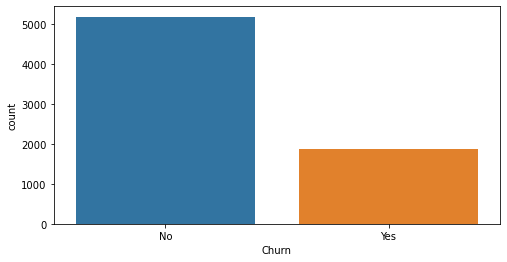

In [3]:
# Let's see the Churn

plt.figure(figsize=(8,4))

sns.countplot(x='Churn',data=df)

In [4]:
# Let's see the types of values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Mining

In [5]:
# Get all the categorical features of the DataFrame (without 'customerID')

cat_feats = ['gender','Partner','Dependents','PhoneService','SeniorCitizen','MultipleLines','InternetService',
             'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies', 
             'Contract', 'PaperlessBilling','PaymentMethod' ]

In [6]:
# Convert Churn into a dummy variable
df = pd.get_dummies(df,columns = ['Churn'], drop_first=True)

In [7]:
# Convert the categories into integers

from category_encoders import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(cols=cat_feats, handle_missing='return_nan')

df = ordinal_encoder.fit_transform(df)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,7590-VHVEG,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,29.85,29.85,0
1,5575-GNVDE,2.0,1.0,2.0,1.0,34,2.0,2.0,1.0,2.0,...,2.0,1.0,1.0,1.0,2.0,2.0,2.0,56.95,1889.50,0
2,3668-QPYBK,2.0,1.0,2.0,1.0,2,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,53.85,108.15,1
3,7795-CFOCW,2.0,1.0,2.0,1.0,45,1.0,1.0,1.0,2.0,...,2.0,2.0,1.0,1.0,2.0,2.0,3.0,42.30,1840.75,0
4,9237-HQITU,1.0,1.0,2.0,1.0,2,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70.70,151.65,1


### Split the Data

In [8]:
X = df.drop(['customerID','Churn_Yes'], axis=1)  # Indepedent variable

y = df['Churn_Yes']                              # Dependent variable

In [9]:
# Verify output
y.unique()

array([0, 1], dtype=uint8)

In [10]:
# Lets see how imbalance is this dataset looking for y=1:
sum(y) / len(y)

0.2653698707936959

In [11]:
# Split the data into a training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify=y)

In [12]:
# Let's see if stratify worked as expected, creating groups with the same proportion of 1's and 0's.

print(sum(y_train) / len(y_train))
print(sum(y_test) / len(y_test))

0.2653144016227181
0.26549929010885


### Build LGBM Model

In [13]:
from lightgbm import LGBMClassifier

# Create an instance of LGBMClassifier
model = LGBMClassifier()             

# Fit the data to the training set
model.fit(X_train,     
          y_train,     
          verbose=True,                 # Verbosity of printing messages
          eval_metric='aucpr',          # Area under the PR curve
          eval_set=[(X_test,y_test)])   # Train with the train dataset, but evaluete the how many trees with the test dataset

[1]	valid_0's binary_logloss: 0.551169
[2]	valid_0's binary_logloss: 0.529083
[3]	valid_0's binary_logloss: 0.512016
[4]	valid_0's binary_logloss: 0.49806
[5]	valid_0's binary_logloss: 0.486532
[6]	valid_0's binary_logloss: 0.476194
[7]	valid_0's binary_logloss: 0.468466
[8]	valid_0's binary_logloss: 0.461481
[9]	valid_0's binary_logloss: 0.455758
[10]	valid_0's binary_logloss: 0.451185
[11]	valid_0's binary_logloss: 0.447298
[12]	valid_0's binary_logloss: 0.443382
[13]	valid_0's binary_logloss: 0.440068
[14]	valid_0's binary_logloss: 0.438172
[15]	valid_0's binary_logloss: 0.43618
[16]	valid_0's binary_logloss: 0.434248
[17]	valid_0's binary_logloss: 0.432857
[18]	valid_0's binary_logloss: 0.431905
[19]	valid_0's binary_logloss: 0.430578
[20]	valid_0's binary_logloss: 0.430046
[21]	valid_0's binary_logloss: 0.429611
[22]	valid_0's binary_logloss: 0.428962
[23]	valid_0's binary_logloss: 0.428311
[24]	valid_0's binary_logloss: 0.427697
[25]	valid_0's binary_logloss: 0.427739
[26]	valid_

LGBMClassifier()

In [14]:
# Make predictions
predictions = model.predict(X_test)

### Results Obtained

In [15]:
# Classification metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [16]:
# Check the model's accuracy
accuracy_score(predictions, y_test)

0.7941315664931378

In [17]:
# Print the confusion Matrix
confusion_matrix(predictions, y_test)

array([[1389,  272],
       [ 163,  289]], dtype=int64)

In [18]:
# Plot the confussion matrix
from sklearn.metrics import plot_confusion_matrix

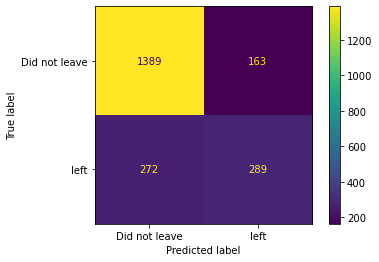

In [19]:
# Plot Confusion Matrix

plot_confusion_matrix(model,              # estimator
                      X_test,             # X
                      y_test,             # y-true
                      values_format='d',
                      display_labels=['Did not leave', 'left'])

In [20]:
# Print the classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1661
           1       0.52      0.64      0.57       452

    accuracy                           0.79      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.81      0.79      0.80      2113



### Plot Tree

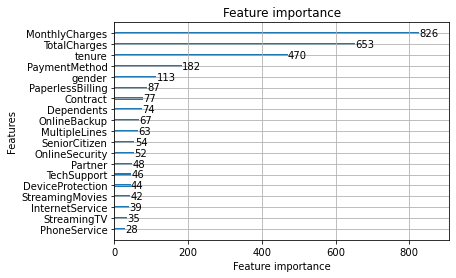

In [21]:
_ = lgb.plot_importance(model) # feature importance

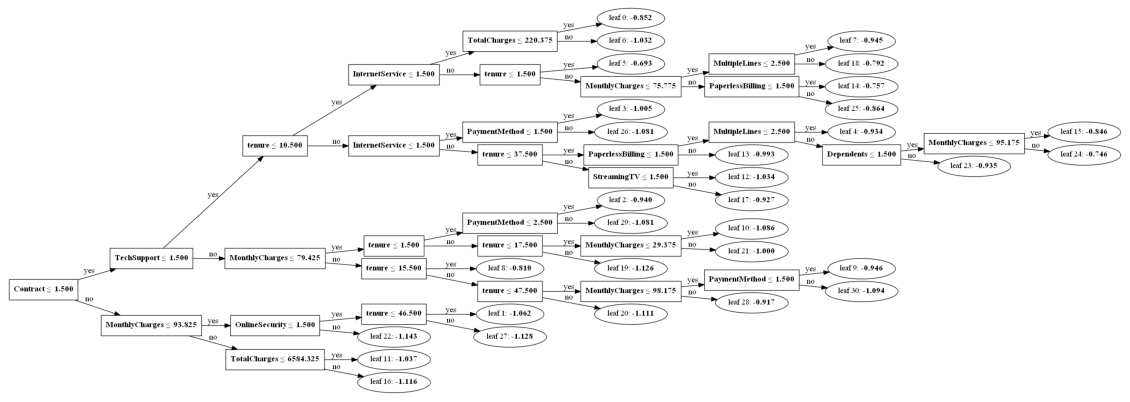

In [22]:
_ = lgb.plot_tree(model, figsize=(20, 20)) # built trees

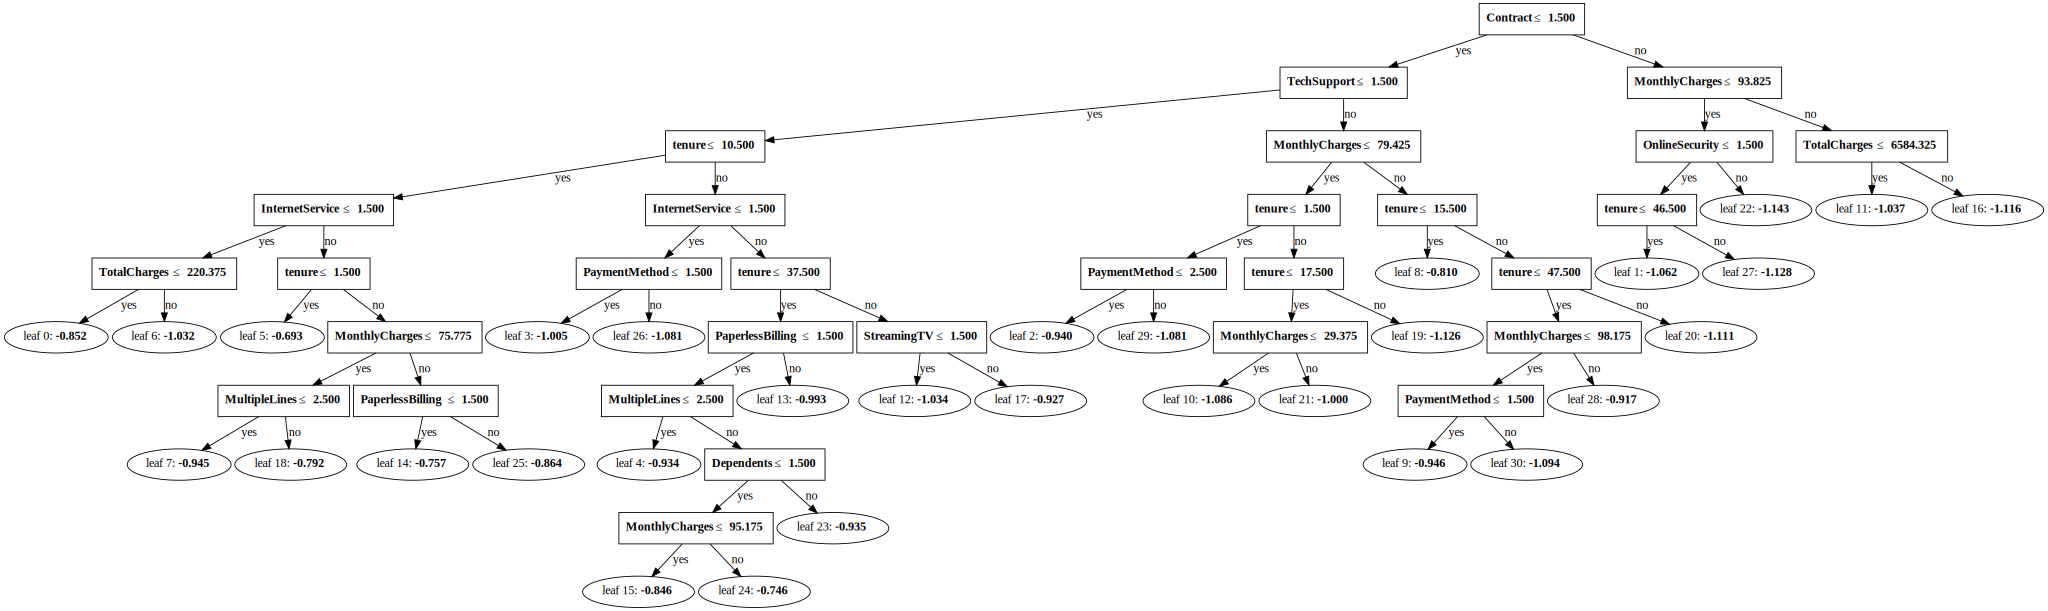

In [23]:
lgb.create_tree_digraph(model, orientation='vertical')